GPU allocation

In [ ]:
!pip install tensorflow-gpu

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
!nvidia-smi

In [ ]:
!nvidia-smi -L

Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from glob import glob

In [ ]:
train_path = '/content/drive/MyDrive/Five_faces_cropped/train'
test_path = '/content/drive/MyDrive/Five_faces_cropped/test'

Import inception model

In [ ]:
IMAGE_SIZE = [224,224]

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
model = InceptionV3(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Five_faces_cropped/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Five_faces_cropped/train/trump',
 '/content/drive/MyDrive/Five_faces_cropped/train/jack',
 '/content/drive/MyDrive/Five_faces_cropped/train/modi',
 '/content/drive/MyDrive/Five_faces_cropped/train/gates',
 '/content/drive/MyDrive/Five_faces_cropped/train/musk']

Custom Layers

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
x = model.output

x = GlobalAveragePooling2D()(x)
x = Dropout(.25)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

#x = Dense(256, activation='relu')(x)
#x = Dense(128, activation='relu')(x)
#x = Dense(512, activation='relu')(x)
#x = Flatten()(x)
predictions = Dense(len(folders), activation='softmax')(x)

model_1 = Model(inputs=model.input, outputs=predictions)    

model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

Compile model

In [ ]:
from tensorflow.keras.optimizers import Adam
model_1.compile(optimizer=Adam(lr=0.000105),loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Data Augmentataion

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=False)

Found 1821 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 432 images belonging to 5 classes.


Fit model

In [ ]:
r = model_1.fit_generator(training_set,validation_data=test_set,epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
57/57 [==============================] - 766s 13s/step - loss: 1.7120 - accuracy: 0.2062 - val_loss: 1.4791 - val_accuracy: 0.4236
Epoch 2/100
57/57 [==============================] - 25s 432ms/step - loss: 1.4682 - accuracy: 0.3569 - val_loss: 1.1696 - val_accuracy: 0.5208
Epoch 3/100
57/57 [==============================] - 25s 432ms/step - loss: 1.1755 - accuracy: 0.5068 - val_loss: 0.9093 - val_accuracy: 0.6157
Epoch 4/100
57/57 [==============================] - 24s 423ms/step - loss: 1.0171 - accuracy: 0.5750 - val_loss: 0.7827 - val_accuracy: 0.6690
Epoch 5/100
57/57 [==============================] - 24s 419ms/step - loss: 0.8874 - accuracy: 0.6591 - val_loss: 0.6693 - val_accuracy: 0.7106
Epoch 6/100
57/57 [==============================] - 24s 419ms/step - loss: 0.8114 - accuracy: 0.6781 - val_loss: 0.5878 - val_accuracy: 0.7569
Epoch 7/100
57/57 [==============================] - 24s 421ms/step - loss: 0.7010 - accuracy: 0.7366 - val_loss: 0.5178 - val_accuracy: 

Plot graph ACCURACY VS EPOCHS AND LOSS VS EPOCHS

In [ ]:
import matplotlib.pyplot as plt

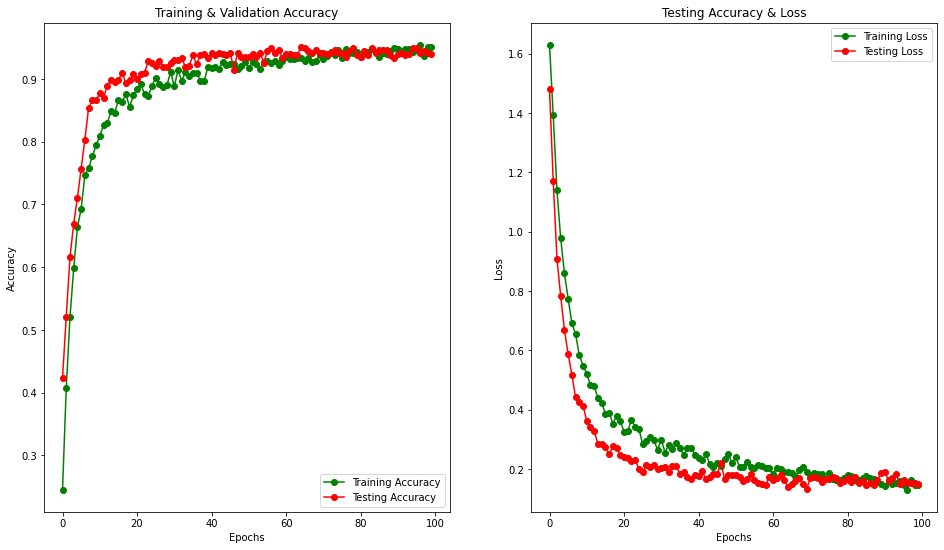

In [ ]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

Predict single image

In [ ]:
import cv2
from PIL import Image
import numpy as np
testing = cv2.imread('/content/drive/MyDrive/Five_faces_cropped/train/musk/musk105.jpg')

face = testing
#print(face.shape)
face = cv2.resize(face, (224,224))
#print(face.shape)
im = Image.fromarray(face, 'RGB')
#Resizing into 128x128 because we trained the model with this image size.
img_array = np.array(im) 
img_array = img_array/255
#Our keras model used a 4D tensor, (images x height x width x channel)
#So changing dimension 128x128x3 into 1x128x128x3 
img_array = np.expand_dims(img_array, axis=0)
pred = model_1.predict(img_array)
print(pred)
a=np.argmax(pred, axis=1)
print(a)

Save model

In [ ]:
#model_1.save("/content/drive/MyDrive/model/model__.h5")

In [ ]:
Evaluate models performance

In [ ]:
from tensorflow import keras
model_a = keras.models.load_model('/content/drive/MyDrive/model/model_high_acc_5_4_21.h5')

In [ ]:
model_a.evaluate(test_set)

14/14 [==============================] - 142s 8s/step - loss: 0.1680 - accuracy: 0.9375


[0.16795192658901215, 0.9375]

In [ ]:
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/model/model_high_acc_5_4_21.h5')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Y_pred = model1.predict_generator(test_set, len(test_set.classes)//test_set.batch_size +1)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,

In [ ]:
print('Confusion Matrix')
cf = confusion_matrix(test_set.classes, y_pred)
print(cf)

Confusion Matrix
[[64  4  0  3  1]
 [ 1 83  0  4  2]
 [ 0  0 90  0  0]
 [ 1  6  1 80  2]
 [ 0  1  1  0 88]]


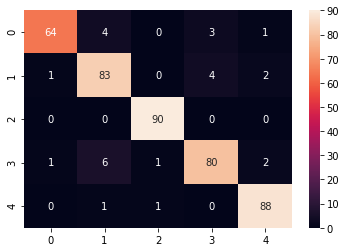

In [ ]:
import seaborn as sns
sns.heatmap(cf,annot=True)

In [ ]:
test_set.class_indices

{'gates': 0, 'jack': 1, 'modi': 2, 'musk': 3, 'trump': 4}

In [ ]:
print('Classification Report')
target_names = ['gates', 'jack', 'modi', 'musk', 'trump']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       gates       0.97      0.89      0.93        72
        jack       0.88      0.92      0.90        90
        modi       0.98      1.00      0.99        90
        musk       0.92      0.89      0.90        90
       trump       0.95      0.98      0.96        90

    accuracy                           0.94       432
   macro avg       0.94      0.94      0.94       432
weighted avg       0.94      0.94      0.94       432

